# TPROC-C Analysis

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Open log files

In [115]:
def log_opener(file_path):
    with open(file_path, 'r') as file:
    # Read all lines from the file
        lines = file.readlines()
        
    empty_list = []

    # Iterate over lines starting from the third line (index 2)
    for line in lines[2:]:
        # Split each line by spaces
        parts = line.split()
    
        # Extract the first number from the parts and convert it to an integer
        first_number = int(parts[0])
    
        # Append the first number to the list
        empty_list.append(first_number)

    # Print the list of first numbers
    return empty_list

In [116]:
# Open and read the file
hammer_local_1 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_local_500.log") # SF = 500 transactions in total
hammer_local_2 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_local_5000.log") # SF = 5,000 transactions in total
hammer_local_3 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_local_50000.log") # SF = 50,000 transactions in total
hammer_local_4 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_local_500000.log") # SF = 500,000 transactions in total

hammer_azure_1 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_azure_500.log") # SF = 500 transactions in total
hammer_azure_2 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_azure_5000.log") # SF = 5,000 transactions in total
hammer_azure_3 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_azure_50000.log") # SF = 50,000 transactions in total
hammer_azure_4 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_azure_500000.log") # SF = 500,000 transactions in total

hammer_gcloud_1 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_gcloud_500.log") # SF = 500 transactions in total
hammer_gcloud_2 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_gcloud_5000.log") # SF = 5,000 transactions in total
hammer_gcloud_3 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_gcloud_50000.log") # SF = 50,000 transactions in total
hammer_gcloud_4 = log_opener("C:\\Users\\valer\\Desktop\\Advanced_Databases\\adb_project\\ADB_Project\\tproc_c\\hammer_gcloud_500000.log") # SF = 500,000 transactions in total

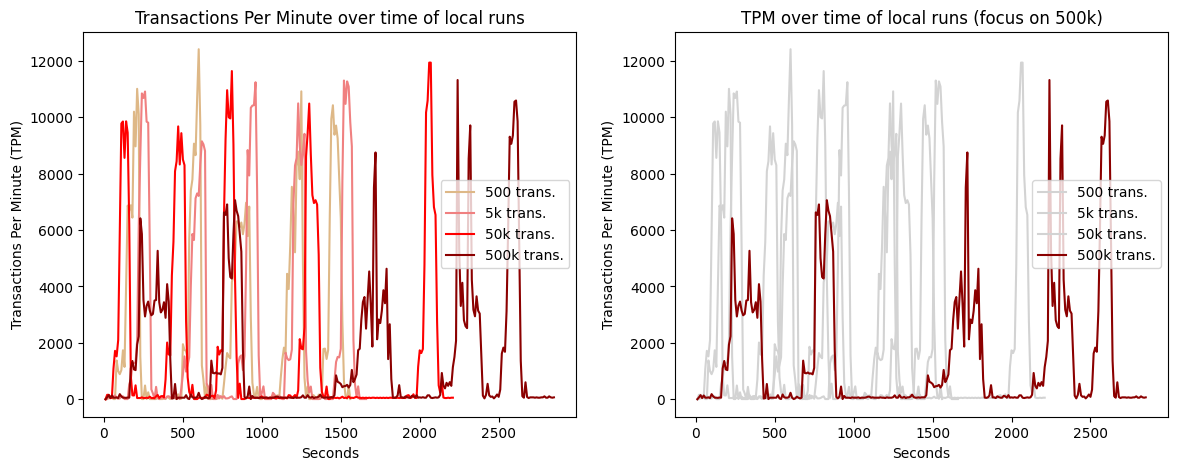

In [117]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
x_values = np.arange(10, 10 + len(hammer_local_1) * 10, 10)
plt.plot(x_values, hammer_local_1, label='500 trans.', color='burlywood')
x_values = np.arange(10, 10 + len(hammer_local_2) * 10, 10)
plt.plot(x_values, hammer_local_2, label='5k trans.', color='lightcoral')
x_values = np.arange(10, 10 + len(hammer_local_3) * 10, 10)
plt.plot(x_values, hammer_local_3, label='50k trans.', color='red')
x_values = np.arange(10, 10 + len(hammer_local_4) * 10, 10)
plt.plot(x_values, hammer_local_4, label='500k trans.', color='darkred')

plt.xlabel('Seconds')
plt.ylabel('Transactions Per Minute (TPM)')
plt.title('Transactions Per Minute over time of local runs')
plt.legend()

plt.subplot(1,2,2)
x_values = np.arange(10, 10 + len(hammer_local_1) * 10,  10)
plt.plot(x_values, hammer_local_1, label='500 trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_local_2) * 10, 10)
plt.plot(x_values, hammer_local_2, label='5k trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_local_3) * 10, 10)
plt.plot(x_values, hammer_local_3, label='50k trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_local_4) * 10, 10)
plt.plot(x_values, hammer_local_4, label='500k trans.', color='darkred')

plt.xlabel('Seconds')
plt.ylabel('Transactions Per Minute (TPM)')
plt.title('TPM over time of local runs (focus on 500k)')
plt.legend()
plt.show()

The local runs do not show particular problems. The null sections represent both the rampup times of the runs and the time elapsed between one run and the other. On the other side, the peaks represent the actual benchmark execution.

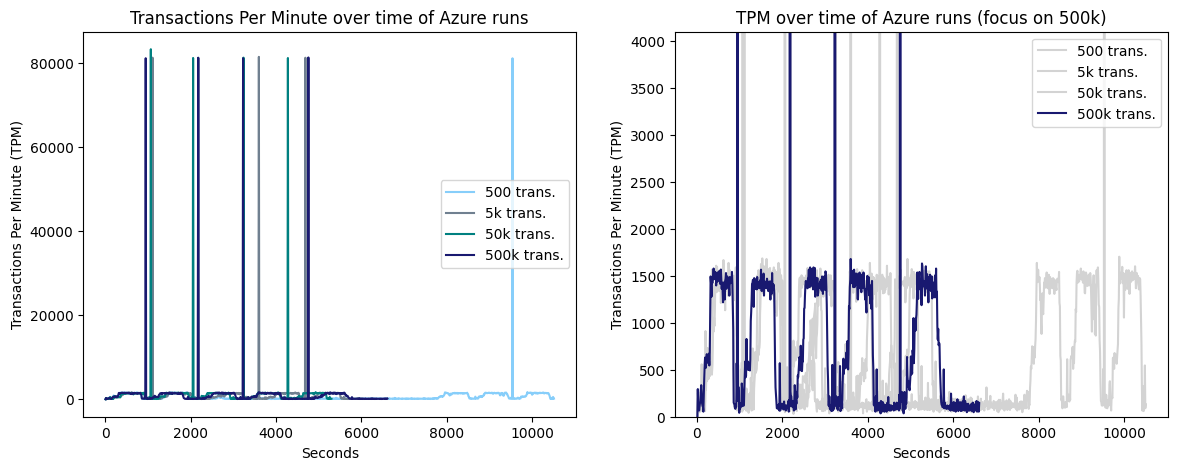

In [118]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
x_values = np.arange(10, 10 + len(hammer_azure_1) * 10, 10)
plt.plot(x_values, hammer_azure_1, label='500 trans.', color='lightskyblue')
x_values = np.arange(10, 10 + len(hammer_azure_2) * 10, 10)
plt.plot(x_values, hammer_azure_2, label='5k trans.', color='slategray')
x_values = np.arange(10, 10 + len(hammer_azure_3) * 10, 10)
plt.plot(x_values, hammer_azure_3, label='50k trans.', color='teal')
x_values = np.arange(10, 10 + len(hammer_azure_4) * 10, 10)
plt.plot(x_values, hammer_azure_4, label='500k trans.', color='midnightblue')

plt.xlabel('Seconds')
plt.ylabel('Transactions Per Minute (TPM)')
plt.title('Transactions Per Minute over time of Azure runs')
plt.legend()

plt.subplot(1,2,2)
x_values = np.arange(10, 10 + len(hammer_azure_1) * 10, 10)
plt.plot(x_values, hammer_azure_1, label='500 trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_azure_2) * 10, 10)
plt.plot(x_values, hammer_azure_2, label='5k trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_azure_3) * 10, 10)
plt.plot(x_values, hammer_azure_3, label='50k trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_azure_4) * 10, 10)
plt.plot(x_values, hammer_azure_4, label='500k trans.', color='midnightblue')

plt.xlabel('Seconds')
plt.ylabel('Transactions Per Minute (TPM)')
plt.title('TPM over time of Azure runs (focus on 500k)')
plt.legend()
plt.ylim([0,4100])
plt.show()

Azure runs seems more problematic. They main differences w.r.t local runs are:
1. spikes in TPM at the end of some runs;
2. a lower TPM during the execution of the test.

Those two aspects are clearly linked, and can be explained in a simple way. Due to limited resources, the servers have a limited amount of IOPS. This has point 2. a direct consequence. All the transactions that the system was not able to run on cloud, are discarded or ran locally.

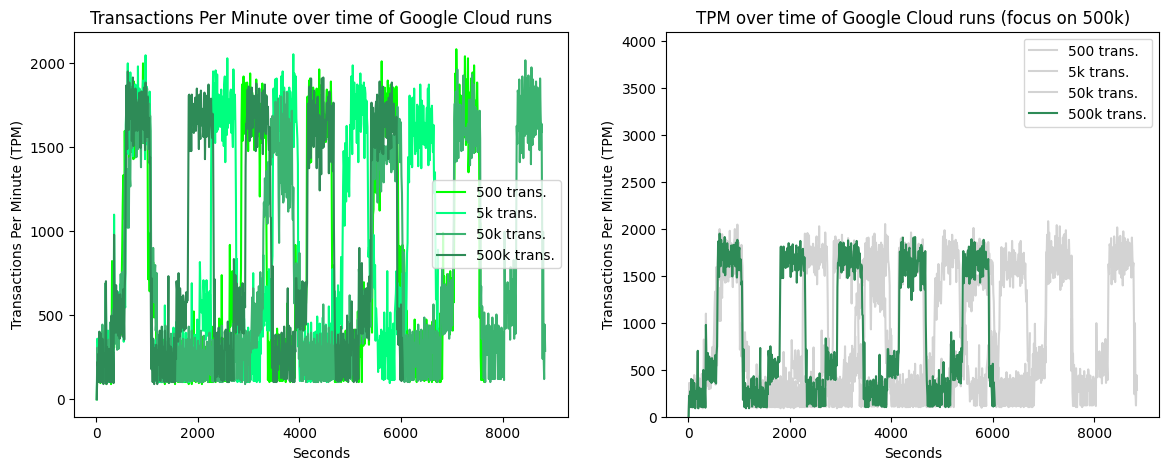

In [119]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
x_values = np.arange(10, 10 + len(hammer_gcloud_1) * 10, 10)
plt.plot(x_values, hammer_gcloud_1, label='500 trans.', color='lime')
x_values = np.arange(10, 10 + len(hammer_gcloud_2) * 10, 10)
plt.plot(x_values, hammer_gcloud_2, label='5k trans.', color='springgreen')
x_values = np.arange(10, 10 + len(hammer_gcloud_3) * 10, 10)
plt.plot(x_values, hammer_gcloud_3, label='50k trans.', color='mediumseagreen')
x_values = np.arange(10, 10 + len(hammer_gcloud_4) * 10, 10)
plt.plot(x_values, hammer_gcloud_4, label='500k trans.', color='seagreen')

plt.xlabel('Seconds')
plt.ylabel('Transactions Per Minute (TPM)')
plt.title('Transactions Per Minute over time of Google Cloud runs')
plt.legend()

plt.subplot(1,2,2)
x_values = np.arange(10, 10 + len(hammer_gcloud_1) * 10, 10)
plt.plot(x_values, hammer_gcloud_1, label='500 trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_gcloud_2) * 10, 10)
plt.plot(x_values, hammer_gcloud_2, label='5k trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_gcloud_3) * 10, 10)
plt.plot(x_values, hammer_gcloud_3, label='50k trans.', color='lightgrey')
x_values = np.arange(10, 10 + len(hammer_gcloud_4) * 10, 10)
plt.plot(x_values, hammer_gcloud_4, label='500k trans.', color='seagreen')

plt.xlabel('Seconds')
plt.ylabel('Transactions Per Minute (TPM)')
plt.title('TPM over time of Google Cloud runs (focus on 500k)')
plt.legend()
plt.ylim([0,4100])
plt.show()

Google Cloud has also a limit on the IOPS, but it does not exhibit peaks.

Here we create two functions. The first one (sublist_creator) "cut" the time series in order to consider only the actual benchmark execution. The second one (calculate_averages) takes as input sublist_creator and compute the average over the runs.

In [120]:
def sublist_creator(time_series, threshold):
    flag = 0 # flag=0 (flag=1): part of benchmark where the benchmark did not start (started)
    outer_list = []
    inner_list = []

    for element in time_series:
        
        # If the TPM are higher than the threshold AND the benchmark did not start AND it's not a server-run's outlier
        if element > threshold and flag == 0 and element < 50000:
            flag = 1 # start benchmark
            inner_list.append(element) # consider the element

        # If the TPM are higher than the threshold AND the benchmark started
        if element > threshold and flag == 1:
            inner_list.append(element) # consider the element
        
        # If the TPM is smaller than the threshold AND the benchmark started
        if element <= threshold and flag == 1:
            flag = 0 # stop benchmark
            if len(inner_list) > 9: # Checks if the extracted portion is actually a benchmark run
                outer_list.append(inner_list) # append the benchmark elements to the bigger list
            inner_list = [] # reset the biggest list
            
    return outer_list

In [121]:
sublist_hammer_local_1 = sublist_creator(hammer_local_1, 250)
sublist_hammer_local_2 = sublist_creator(hammer_local_2, 250)
sublist_hammer_local_3 = sublist_creator(hammer_local_3, 250)
sublist_hammer_local_4 = sublist_creator(hammer_local_4, 250)

sublist_hammer_azure_1 = sublist_creator(hammer_azure_1, 250)
sublist_hammer_azure_2 = sublist_creator(hammer_azure_2, 250)
sublist_hammer_azure_3 = sublist_creator(hammer_azure_3, 250)
sublist_hammer_azure_4 = sublist_creator(hammer_azure_4, 250)

sublist_hammer_gcloud_1 = sublist_creator(hammer_gcloud_1, 300)
sublist_hammer_gcloud_2 = sublist_creator(hammer_gcloud_2, 300)
sublist_hammer_gcloud_3 = sublist_creator(hammer_gcloud_3, 300)
sublist_hammer_gcloud_4 = sublist_creator(hammer_gcloud_4, 300)

Two lists require still manual intervention

In [130]:
print(len(sublist_hammer_azure_1))
del sublist_hammer_azure_1[2]
print(len(sublist_hammer_gcloud_3))
del sublist_hammer_gcloud_3[0]

6
6


In [131]:
def calculate_averages(lists):
    
    # Aligns the inner lists (as they may have different lengths)
    max_len = max(map(len, lists))
    aligned_lists = [lst + [0] * (max_len - len(lst)) for lst in lists]
    
    # Use zip to iterate over the corresponding elements of each list
    averages = [sum(values) / len(values) for values in zip(*aligned_lists)]
    
    return averages

In [132]:
avg_hammer_local_1 = calculate_averages(sublist_hammer_local_1)
avg_hammer_local_2 = calculate_averages(sublist_hammer_local_2)
avg_hammer_local_3 = calculate_averages(sublist_hammer_local_3)
avg_hammer_local_4 = calculate_averages(sublist_hammer_local_4)

avg_hammer_azure_1 = calculate_averages(sublist_hammer_azure_1)
avg_hammer_azure_2 = calculate_averages(sublist_hammer_azure_2)
avg_hammer_azure_3 = calculate_averages(sublist_hammer_azure_3)
avg_hammer_azure_4 = calculate_averages(sublist_hammer_azure_4)

avg_hammer_gcloud_1 = calculate_averages(sublist_hammer_gcloud_1)
avg_hammer_gcloud_2 = calculate_averages(sublist_hammer_gcloud_2)
avg_hammer_gcloud_3 = calculate_averages(sublist_hammer_gcloud_3)
avg_hammer_gcloud_4 = calculate_averages(sublist_hammer_gcloud_4)

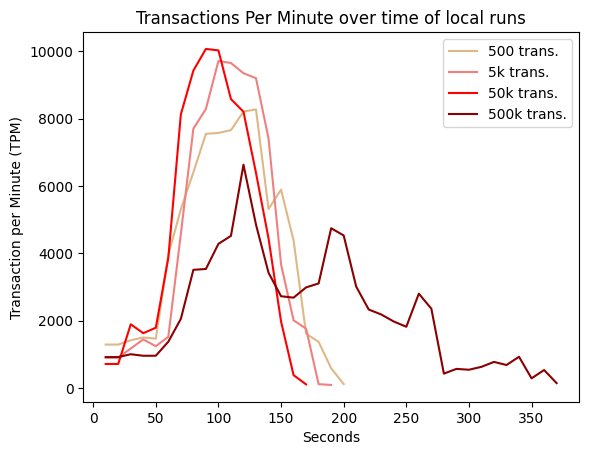

In [133]:
# Create a line plot for each list
x_values = np.arange(10, 10 + len(avg_hammer_local_1) * 10, 10)
plt.plot(x_values, avg_hammer_local_1, label='500 trans.', color='burlywood')
x_values = np.arange(10, 10 + len(avg_hammer_local_2) * 10, 10)
plt.plot(x_values, avg_hammer_local_2, label='5k trans.', color='lightcoral')
x_values = np.arange(10, 10 + len(avg_hammer_local_3) * 10, 10)
plt.plot(x_values, avg_hammer_local_3, label='50k trans.', color='red')
x_values = np.arange(10, 10 + len(avg_hammer_local_4) * 10, 10)
plt.plot(x_values, avg_hammer_local_4, label='500k trans.', color='darkred')

# Add labels and title
plt.xlabel('Seconds')
plt.ylabel('Transaction per Minute (TPM)')
plt.title('Transactions Per Minute over time of local runs')

# Add legend
plt.legend()

# Show the plot
plt.show()

Main observation: the scale is too small to observe any interesting difference (all the tests lasted for way less than the maximum duration, 600 seconds).

Biggest scale: the system decided to spread more the transactions over time.

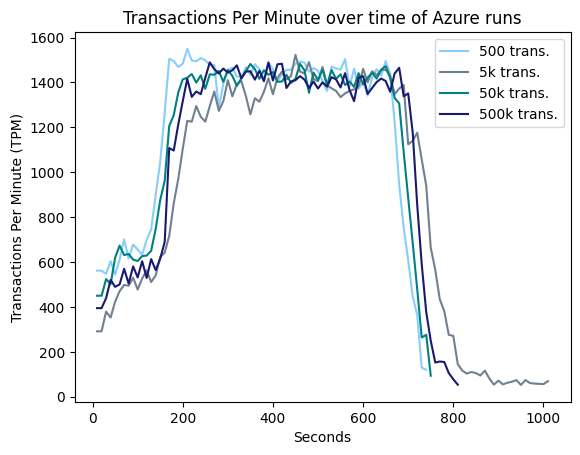

In [134]:
x_values = np.arange(10, 10 + len(avg_hammer_azure_1) * 10, 10)
plt.plot(x_values, avg_hammer_azure_1, label='500 trans.', color='lightskyblue')
x_values = np.arange(10, 10 + len(avg_hammer_azure_2) * 10, 10)
plt.plot(x_values, avg_hammer_azure_2, label='5k trans.', color='slategray')
x_values = np.arange(10, 10 + len(avg_hammer_azure_3) * 10, 10)
plt.plot(x_values, avg_hammer_azure_3, label='50k trans.', color='teal')
x_values = np.arange(10, 10 + len(avg_hammer_azure_4) * 10, 10)
plt.plot(x_values, avg_hammer_azure_4, label='500k trans.', color='midnightblue')

plt.xlabel('Seconds')
plt.ylabel('Transactions Per Minute (TPM)')
plt.title('Transactions Per Minute over time of Azure runs')
plt.legend()
plt.show()

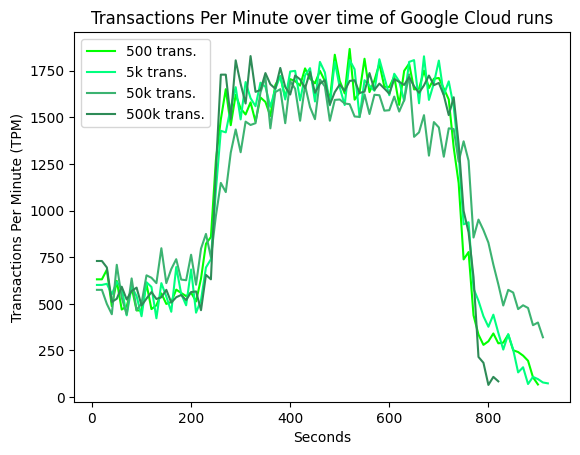

In [135]:
x_values = np.arange(10, 10 + len(avg_hammer_gcloud_1) * 10, 10)
plt.plot(x_values, avg_hammer_gcloud_1, label='500 trans.', color='lime')
x_values = np.arange(10, 10 + len(avg_hammer_gcloud_2) * 10, 10)
plt.plot(x_values, avg_hammer_gcloud_2, label='5k trans.', color='springgreen')
x_values = np.arange(10, 10 + len(avg_hammer_gcloud_3) * 10, 10)
plt.plot(x_values, avg_hammer_gcloud_3, label='50k trans.', color='mediumseagreen')
x_values = np.arange(10, 10 + len(avg_hammer_gcloud_4) * 10, 10)
plt.plot(x_values, avg_hammer_gcloud_4, label='500k trans.', color='seagreen')

plt.xlabel('Seconds')
plt.ylabel('Transactions Per Minute (TPM)')
plt.title('Transactions Per Minute over time of Google Cloud runs')
plt.legend()
plt.show()

The code analysis confirmed what said before. The TPM can be at most around 1600 due to server limitations, so the server is unable to accept the workload. This is true independentely of the scale factor. This is true both for Google Cloud and Microsoft Azure.